#Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data

## 1. Data Loading and Exploration

In [35]:
#Reviewing the data structure and identifying the size of the dataset, if there Nan Value, and if there duplicates
import pandas as pd

apple_df = pd.read_csv('apple_stock.csv')
print(apple_df.head())
print(apple_df.info())
print(apple_df.describe())
print(apple_df.shape)
print(apple_df.isna().sum())
print(apple_df.duplicated().sum())

         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time      

In [36]:
#Ensure columns have the correct data types
apple_df['time'] = pd.to_datetime(apple_df['time'], unit='s')
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   datetime64[ns]
 7   transactions  4159 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 260.1 KB


            volume     vwap     open    close     high      low  \
0     1.245445e+09   3.0302   3.0821   2.9929   3.0921   2.9250   
4     3.352007e+09   3.1946   3.0875   3.3061   3.3207   3.0411   
5     2.957842e+09   3.4289   3.3839   3.4643   3.4929   3.3375   
6     1.442127e+09   3.4267   3.4264   3.4214   3.4564   3.3964   
7     1.312948e+09   3.3663   3.3782   3.3793   3.3950   3.3296   
...            ...      ...      ...      ...      ...      ...   
1310  1.159671e+09  21.0679  21.4146  20.9129  21.4289  20.6625   
1480  1.266891e+09  18.5998  18.7571  18.8456  18.9286  18.0625   
1493  1.177171e+09  19.2937  18.8907  19.5444  19.7611  18.5225   
1525  1.460852e+09  16.3451  16.4286  16.0893  16.6332  16.0804   
1526  1.207968e+09  15.8935  16.1318  15.7100  16.2939  15.5357   

                    time  transactions  
0    2007-01-03 05:00:00        189737  
4    2007-01-09 05:00:00        569578  
5    2007-01-10 05:00:00        472159  
6    2007-01-11 05:00:00       

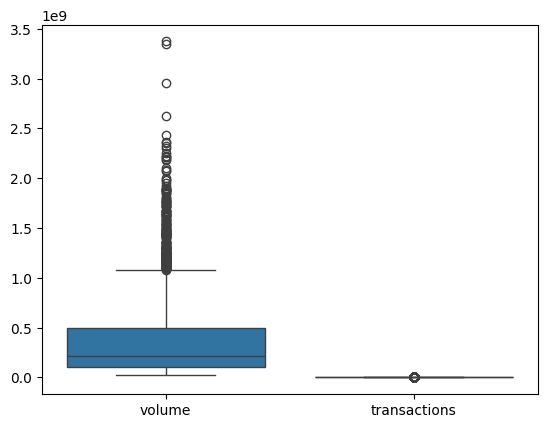

In [37]:
import seaborn as sns
sns.boxplot(data=apple_df[['volume', 'transactions']])
Q1 = apple_df['volume'].quantile(0.25)
Q3 = apple_df['volume'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = apple_df[apple_df['volume'] > upper_bound]
print(outliers)


The values ​​identified far exceed the normal volume range (upper_bound).
These values ​​are probably linked to exceptional trading days, such as major events affecting the company's activity

---



We have strong correlation between transaction and volume. This means that a large trading volume is generally associated with a large volume traded. This connection makes sense: the more shares traded, the higher the volume.

the correlation between volume and price columns is weak and negative. This means that changes in volume do not appear to strongly influence prices directly. Large trading volume does not necessarily correspond to higher or lower prices.

The correlation between transactions and prices is even lower
This indicates that the number of transactions does not have a direct relationship with price fluctuations.

In [38]:
correlation = outliers.corr()
print(correlation)

                volume      vwap      open     close      high       low  \
volume        1.000000 -0.186339 -0.184039 -0.184795 -0.177309 -0.195490   
vwap         -0.186339  1.000000  0.999275  0.999426  0.999782  0.999199   
open         -0.184039  0.999275  1.000000  0.998117  0.999372  0.998388   
close        -0.184795  0.999426  0.998117  1.000000  0.999186  0.998626   
high         -0.177309  0.999782  0.999372  0.999186  1.000000  0.998532   
low          -0.195490  0.999199  0.998388  0.998626  0.998532  1.000000   
time         -0.173214  0.784503  0.784699  0.784644  0.788239  0.780061   
transactions  0.918087 -0.118541 -0.115780 -0.117359 -0.107347 -0.129317   

                  time  transactions  
volume       -0.173214      0.918087  
vwap          0.784503     -0.118541  
open          0.784699     -0.115780  
close         0.784644     -0.117359  
high          0.788239     -0.107347  
low           0.780061     -0.129317  
time          1.000000      0.055200  
tra

Exploration of the correlation without the outliers

The correlation between volume and transactions increased from 0.918 to -0.346.
This indicates that outliers played a major role in the positive relationship observed previously.

The correlation between volume and prices (vwap, open, etc.) is now more strongly negative. This means that high volume is associated with a slight price decline

The correlation between volume and time has become strongly negative.
This could indicate a time trend in which trading volumes are decreasing over time. For example, volumes may have been higher in previous years (when Apple debuted) and have declined recently.



In [39]:
cleaned_df = apple_df[apple_df['volume'] <= upper_bound]
correlation_cleaned = cleaned_df.corr()
print(correlation_cleaned)

                volume      vwap      open     close      high       low  \
volume        1.000000 -0.582035 -0.581856 -0.582017 -0.580771 -0.583238   
vwap         -0.582035  1.000000  0.999895  0.999953  0.999959  0.999959   
open         -0.581856  0.999895  1.000000  0.999771  0.999909  0.999891   
close        -0.582017  0.999953  0.999771  1.000000  0.999891  0.999895   
high         -0.580771  0.999959  0.999909  0.999891  1.000000  0.999869   
low          -0.583238  0.999959  0.999891  0.999895  0.999869  1.000000   
time         -0.818541  0.857362  0.857266  0.857303  0.857139  0.857505   
transactions -0.346783  0.792320  0.793653  0.791982  0.796049  0.788992   

                  time  transactions  
volume       -0.818541     -0.346783  
vwap          0.857362      0.792320  
open          0.857266      0.793653  
close         0.857303      0.791982  
high          0.857139      0.796049  
low           0.857505      0.788992  
time          1.000000      0.664482  
tra

<Axes: title={'center': 'Volume Over Time'}, xlabel='time'>

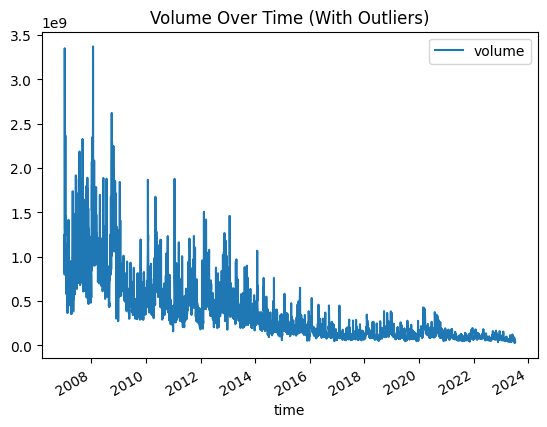

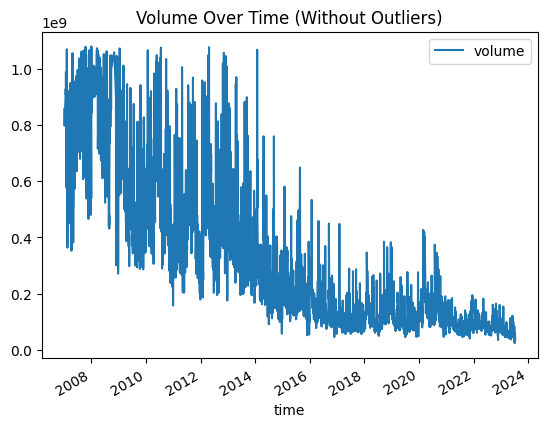

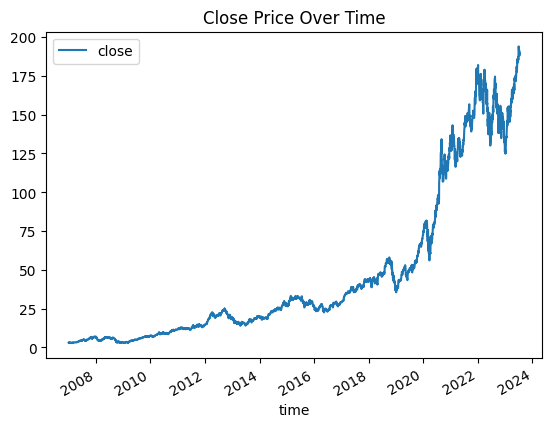

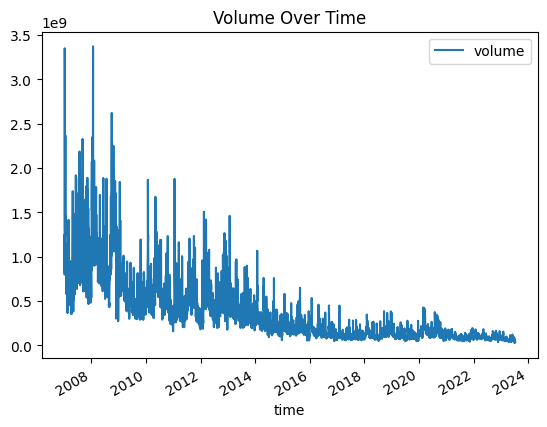

In [40]:
# Avec les outliers
apple_df.plot(x='time', y='volume', title='Volume Over Time (With Outliers)')

# Sans les outliers

cleaned_df.plot(x='time', y='volume', title='Volume Over Time (Without Outliers)')



apple_df.plot(x='time', y='close', title='Close Price Over Time')
apple_df.plot(x='time', y='volume', title='Volume Over Time')


##Data Visualization

Plot closing prices and traded volume over time

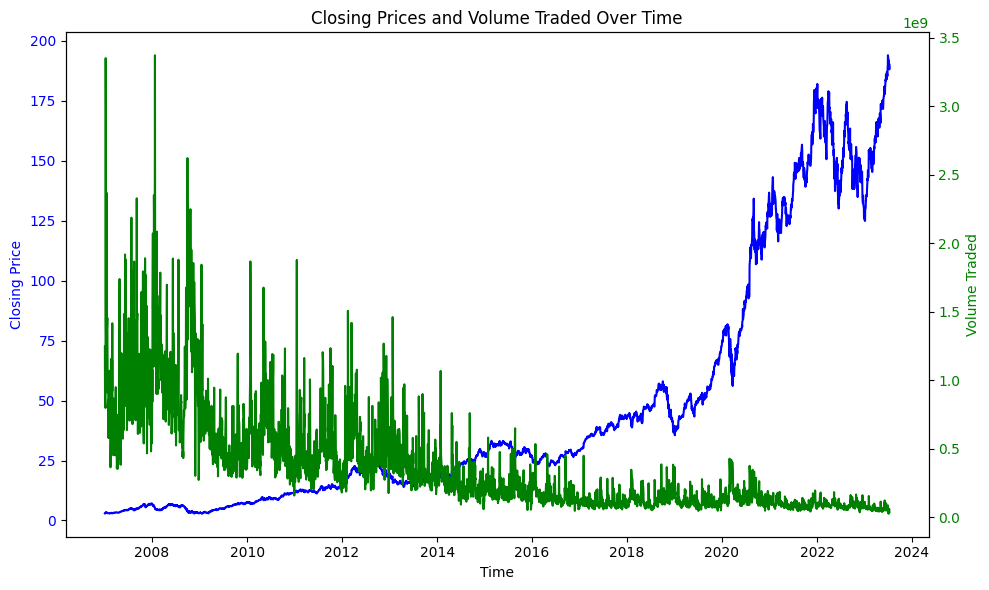

In [41]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(apple_df['time'], apple_df['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(apple_df['time'], apple_df['volume'], color='green', label='Volume Traded')
ax2.set_ylabel('Volume Traded', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Closing Prices and Volume Traded Over Time')
fig.tight_layout()

plt.show()


Same but Interactive

In [42]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=apple_df['time'],
    y=apple_df['close'],
    name='Closing Price',
))


fig.add_trace(go.Scatter(
    x=apple_df['time'],
    y=apple_df['volume'],
    name='Volume Traded',
    line=dict(color='green'),
    yaxis="y2"
))

fig.update_layout(
    title='Closing Prices and Volume Traded Over Time (Interactive)',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Closing Price'),
    yaxis2=dict(
        title='Volume Traded',
        anchor='x',
        overlaying='y',
        side='right'
    ),
    hovermode="x",
)


fig.update_layout(
    xaxis=dict(rangeslider=dict(visible=True))
)

fig.show()


Candlestick chart to depict high and low prices

In [43]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=apple_df['time'],
                open=apple_df['open'],
                high=apple_df['high'],
                low=apple_df['low'],
                close=apple_df['close'])])
fig.update_layout(title='Apple Stock Price (Candlestick Chart)', xaxis=dict(title='Time'), yaxis=dict(title='Price'))
fig.update_layout(
    xaxis=dict(rangeslider=dict(visible=True))
)
fig.show()


##Statistical Analysis



In [44]:
#summary statisctics
stats = apple_df[['open', 'high', 'low', 'close', 'volume', 'transactions']].describe()
print(stats)

              open         high          low        close        volume  \
count  4159.000000  4159.000000  4159.000000  4159.000000  4.159000e+03   
mean     46.362788    46.881127    45.865790    46.396058  3.662925e+08   
std      50.235593    50.843874    49.680104    50.293482  3.724793e+08   
min       2.835400     2.928600     2.792900     2.792900  2.422234e+07   
25%      11.955700    12.028400    11.853600    11.947150  1.067497e+08   
50%      25.775000    26.262800    25.680000    25.825000  2.136463e+08   
75%      52.263750    52.626250    51.796250    52.231250  4.965321e+08   
max     193.780000   194.480000   191.760000   193.970000  3.373042e+09   

       transactions  
count  4.159000e+03  
mean   2.709318e+05  
std    2.510859e+05  
min    3.048700e+04  
25%    1.128150e+05  
50%    1.782460e+05  
75%    3.259555e+05  
max    2.966979e+06  


In [45]:
#calculating the mean on 30 day rolling window
apple_df['close_moving_avg'] = apple_df['close'].rolling(window=30).mean()

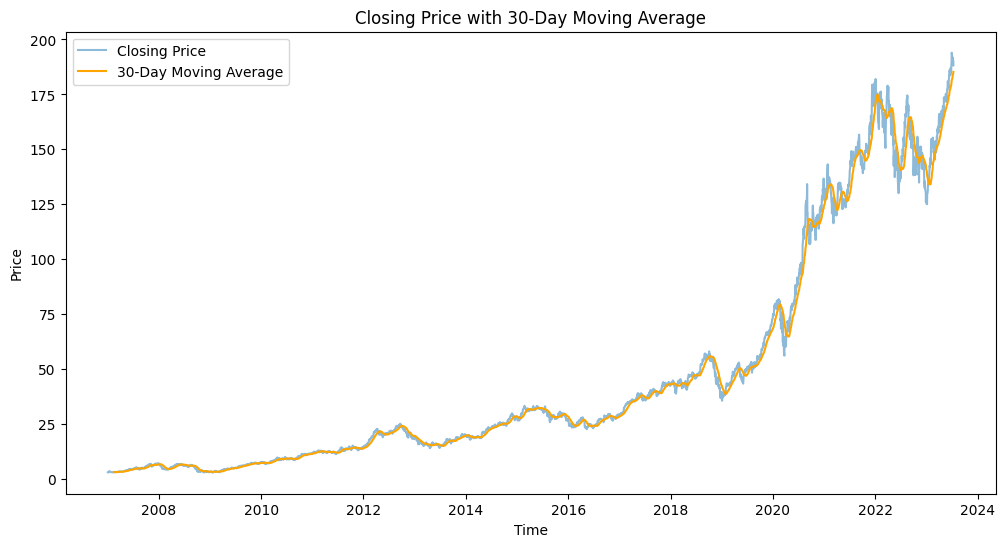

In [46]:
#ploting the 30d moving window average with the closing price
plt.figure(figsize=(12, 6))
plt.plot(apple_df['time'], apple_df['close'], label='Closing Price', alpha=0.5)
plt.plot(apple_df['time'], apple_df['close_moving_avg'], label='30-Day Moving Average', color='orange')
plt.title('Closing Price with 30-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


##Hypothesis Testing


In [47]:
from scipy.stats import ttest_ind

# add a year columnn
apple_df['year'] = apple_df['time'].dt.year

# selecting the close price for specific year
close_2020 = apple_df[apple_df['year'] == 2019]['close']
close_2023 = apple_df[apple_df['year'] == 2022]['close']

# doing the t-test
t_stat, p_value = ttest_ind(close_2020, close_2023, equal_var=False)  # On suppose des variances différentes

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("The closing price averages between 2020 and 2023 are significantly different.")
else:
    print("The closing price averages between 2020 and 2023 are not significantly different.")


T-statistic: -104.08049479938175
P-value: 1.0177136614737475e-308
The closing price averages between 2020 and 2023 are significantly different.


In [48]:
#examining the daily return

apple_df['daily_return'] = apple_df['close'].pct_change()
returns = apple_df[['time', 'daily_return']].dropna()
returns.head(10)

,time,daily_return
1,2007-01-04 05:00:00,0.022186
2,2007-01-05 05:00:00,-0.007126
3,2007-01-08 05:00:00,0.004938
4,2007-01-09 05:00:00,0.083079
5,2007-01-10 05:00:00,0.047851
6,2007-01-11 05:00:00,-0.012383
7,2007-01-12 05:00:00,-0.012305
8,2007-01-16 05:00:00,0.026218
9,2007-01-17 05:00:00,-0.022146
10,2007-01-18 05:00:00,-0.061927


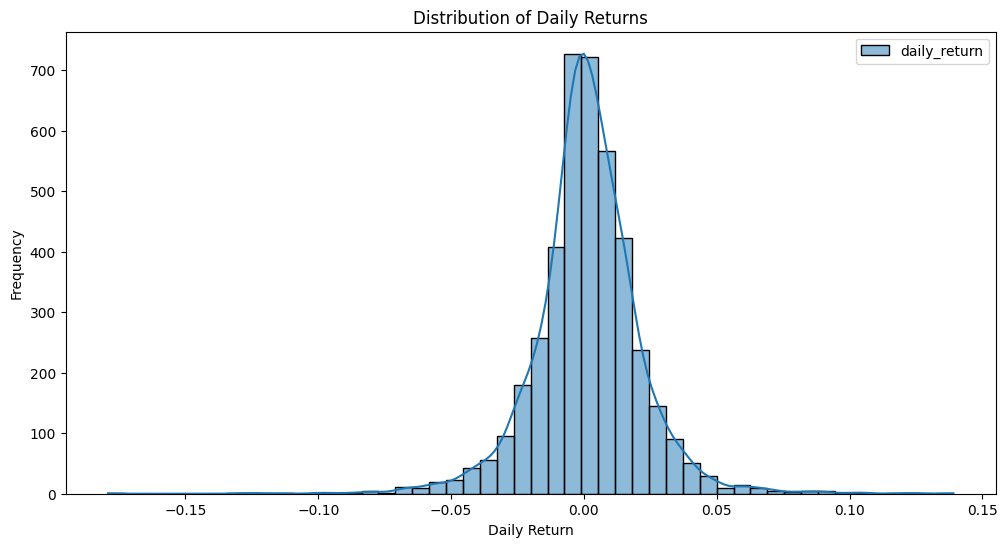

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [66]:
#plotin the daily returns

plt.figure(figsize=(12, 6))
sns.histplot(returns ,kde=True, bins=50, color='skyblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
plt

In [70]:


# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(returns['daily_return'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}, P-value: {shapiro_p_value}")


# Conclusion
if shapiro_p_value < 0.05:
    print("Daily returns do not follow a normal distribution.")
else:
    print("Daily returns follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.940666076855671, P-value: 6.180858977992611e-38
Les rendements journaliers ne suivent pas une distribution normale.


We might think we have a normal distributions here on the graph, but when we apply a normality test using shapiro function, we can the the p value is extremly small far under the 0,05
so the Daily returns do not follow a normal distribution.
